<a href="https://colab.research.google.com/github/skyish21/Salary-Prediction/blob/main/Salary%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
# Data Handling and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

# Evaluation Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Data Loading

In [2]:
df1 = pd.read_csv("/content/Salary Data.csv")
df2 = pd.read_csv("/content/salary_prediction_data.csv")

In [3]:
df1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df2.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


## Dataset Handling

In [5]:
# Rename the columns of df2 to match df1
df2.rename(columns={
    "Education": "Education Level",
    "Experience": "Years of Experience",
    "Job_Title": "Job Title"
}, inplace=True)

In [6]:
# Get unique Job titles in df2
df2['Job Title'].unique()

array(['Manager', 'Director', 'Analyst', 'Engineer'], dtype=object)

In [7]:
# Modify Job Title/Role based on YOE
def add_seniority(yoe):
    if yoe < 2:
        return 'Junior'
    elif yoe < 5:
        return ''  # mid-level, keep as is
    else:
        return 'Senior'

In [8]:
# Apply modification
def apply_seniority(row):
    prefix = add_seniority(row['Years of Experience'])
    if prefix:
        return f"{prefix} {row['Job Title']}".strip()
    return row['Job Title']

df2['Modified Title'] = df2.apply(apply_seniority, axis=1)

In [9]:
df2.head()

,Education Level,Years of Experience,Location,Job Title,Age,Gender,Salary,Modified Title
0,High School,8,Urban,Manager,63,Male,84620.053665,Senior Manager
1,PhD,11,Suburban,Director,59,Male,142591.255894,Senior Director
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404,Senior Manager
3,High School,29,Rural,Director,45,Male,96834.671282,Senior Director
4,PhD,25,Urban,Analyst,26,Female,132157.786175,Senior Analyst


In [10]:
# Rename to match df1 columns
df2.rename(columns={'Job Title': 'Old Job Title'}, inplace=True)
df2.rename(columns={'Modified Title': 'Job Title'}, inplace=True)
df2.drop('Old Job Title', axis=1, inplace=True)

In [11]:
df2.head()

,Education Level,Years of Experience,Location,Age,Gender,Salary,Job Title
0,High School,8,Urban,63,Male,84620.053665,Senior Manager
1,PhD,11,Suburban,59,Male,142591.255894,Senior Director
2,Bachelor,28,Suburban,61,Female,97800.255404,Senior Manager
3,High School,29,Rural,45,Male,96834.671282,Senior Director
4,PhD,25,Urban,26,Female,132157.786175,Senior Analyst


In [12]:
# Analyse salary by location and job title in df2
df2.groupby(["Job Title", "Location"])['Salary'].mean()

Job Title        Location
Analyst          Rural        71055.194769
                 Suburban     85449.773397
                 Urban        82507.018132
Director         Rural       103703.643855
                 Suburban    108230.046571
                 Urban       110930.951628
Engineer         Rural        95168.585409
                 Suburban     85757.227818
                 Urban        88992.793670
Junior Analyst   Rural        72711.559273
                 Suburban     52878.429285
                 Urban        65965.080511
Junior Director  Rural        70712.289964
                 Suburban    121306.835248
                 Urban       124989.990986
Junior Engineer  Rural        80258.923664
                 Suburban     71043.179350
                 Urban        91749.355028
Junior Manager   Rural        98483.175438
                 Suburban     83700.833190
                 Urban       116040.805194
Manager          Rural        89083.277888
                 Suburban    102352.562327
                 Urban        90130.489721
Senior Analyst   Rural        93363.629211
                 Suburban     97465.501303
                 Urban        99985.753367
Senior Director  Rural       113095.109903
                 Suburban    125056.025783
                 Urban       129588.829683
Senior Engineer  Rural        88659.319591
                 Suburban    103929.055468
                 Urban       103153.045656
Senior Manager   Rural       105805.847870
                 Suburban    111208.225315
                 Urban       115650.439438
Name: Salary, dtype: float64

In [13]:
# Get unique Job titles in df1
df1['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [14]:
# Define salary table

salary_table = {
    ('Junior Analyst', 'Rural'): 72711.56,
    ('Junior Analyst', 'Suburban'): 52878.43,
    ('Junior Analyst', 'Urban'): 65965.08,

    ('Analyst', 'Rural'): 71055.19,
    ('Analyst', 'Suburban'): 85449.77,
    ('Analyst', 'Urban'): 82507.02,

    ('Senior Analyst', 'Rural'): 93363.63,
    ('Senior Analyst', 'Suburban'): 97465.50,
    ('Senior Analyst', 'Urban'): 99985.75,


    ('Junior Director', 'Rural'): 70712.29,
    ('Junior Director', 'Suburban'): 121306.84,
    ('Junior Director', 'Urban'): 124989.99,

    ('Director', 'Rural'): 103703.64,
    ('Director', 'Suburban'): 108230.05,
    ('Director', 'Urban'): 110930.95,

    ('Senior Director', 'Rural'): 113095.11,
    ('Senior Director', 'Suburban'): 125056.03,
    ('Senior Director', 'Urban'): 129588.83,

    ('Junior Engineer', 'Rural'): 80258.92,
    ('Junior Engineer', 'Suburban'): 71043.18,
    ('Junior Engineer', 'Urban'): 91749.36,

    ('Engineer', 'Rural'): 95168.59,
    ('Engineer', 'Suburban'): 85757.23,
    ('Engineer', 'Urban'): 88992.79,

    ('Senior Engineer', 'Rural'): 88659.32,
    ('Senior Engineer', 'Suburban'): 103929.06,
    ('Senior Engineer', 'Urban'): 103153.05,

    ('Junior Manager', 'Rural'): 98483.18,
    ('Junior Manager', 'Suburban'): 83700.83,
    ('Junior Manager', 'Urban'): 116040.81,

    ('Manager', 'Rural'): 89083.28,
    ('Manager', 'Suburban'): 102352.56,
    ('Manager', 'Urban'): 90130.49,

    ('Senior Manager', 'Rural'): 105805.85,
    ('Senior Manager', 'Suburban'): 111208.23,
    ('Senior Manager', 'Urban'): 115650.44,
}


In [15]:
# Add a location column to df1 based on above information

def infer_location(row):
    job_title_df1 = str(row['Job Title']).lower()
    salary = row['Salary']

    min_diff = float('inf')
    best_location = 'Unknown'

    for (df2_title, loc), avg_salary in salary_table.items():
        if df2_title.lower() in job_title_df1:
            diff = abs(salary - avg_salary)
            if diff < min_diff:
                min_diff = diff
                best_location = loc

    return best_location

In [16]:
# Apply function to df1 to create new Location column
df1['Location'] = df1.apply(infer_location, axis=1)

In [17]:
df1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Location
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Urban
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Rural
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Urban
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Unknown
4,52.0,Male,Master's,Director,20.0,200000.0,Urban


Some location values are Nan because the job title is not a match. So we fill Nan values only based on salary.

In [18]:
df2.groupby("Location")['Salary'].mean()

,Salary
Location,
Rural,98677.346540
Suburban,107603.371820
Urban,110940.504531


In [19]:
# To fill Unknown values
def salary_based_location(row):
    if row['Location'] != 'Unknown' and pd.notnull(row['Location']):
        return row['Location']

    salary = row['Salary']

    if salary < 99000:
        return 'Rural'
    elif salary <= 110000:
        return 'Suburban'
    else:
        return 'Urban'

In [20]:
df1['Location'] = df1.apply(salary_based_location, axis=1)

In [21]:
df1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Location
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Urban
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Rural
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Urban
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Rural
4,52.0,Male,Master's,Director,20.0,200000.0,Urban


## Merge Datasets

In [22]:
# Merge the datasets df1 and df2
df = pd.concat([df1, df2], ignore_index=True)

In [23]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Location
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,Urban
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,Rural
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Urban
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Rural
4,52.0,Male,Master's,Director,20.0,200000.0,Urban


In [24]:
df1.shape

(375, 7)

In [25]:
df2.shape

(1000, 7)

In [26]:
df.shape

(1375, 7)

In [27]:
# Reset index of merged dataset
df.reset_index(drop=True, inplace=True)

In [28]:
# Define standard mapping for education levels (different in df1 and df2)
education_fix = {
    "High School": "High School",
    "Bachelor's": "Bachelor",
    "Bachelor": "Bachelor",
    "Master's": "Master",
    "Master": "Master",
    "PhD": "PhD"
}

In [29]:
df['Education Level'] = df['Education Level'].map(education_fix)

## EDA (Exploratory Data Analysis)

In [30]:
df.info() # Check datatypes of column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375 entries, 0 to 1374
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1373 non-null   float64
 1   Gender               1373 non-null   object 
 2   Education Level      1373 non-null   object 
 3   Job Title            1373 non-null   object 
 4   Years of Experience  1373 non-null   float64
 5   Salary               1373 non-null   float64
 6   Location             1375 non-null   object 
dtypes: float64(3), object(4)
memory usage: 75.3+ KB


In [31]:
df.describe() # Get dataset statistics

,Age,Years of Experience,Salary
count,1373.000000,1373.000000,1373.000000
mean,41.033503,13.483248,104205.210662
std,12.379579,8.171031,34889.236873
min,20.000000,0.000000,350.000000
25%,31.000000,6.000000,80000.000000
50%,41.000000,13.000000,102744.169953
75%,50.000000,20.000000,128295.224422
max,64.000000,29.000000,250000.000000


In [32]:
df.isnull().sum() # Check for missing values

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2
Location,0


In [33]:
# Check for duplicate values
print(df.duplicated().sum())

50


## Data Pre-processing

In [34]:
# Fill missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Education Level'].fillna(df['Education Level'].mode()[0], inplace=True)
df['Job Title'].fillna(df['Job Title'].mode()[0], inplace=True)
df['Years of Experience'].fillna(df['Years of Experience'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

/tmp/ipython-input-34-4181906604.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-34-4181906604.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [35]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0
Location,0


In [36]:
# No missing values

In [37]:
# Analyse duplicate values
dupes = df[df.duplicated(keep=False)]
dupes.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Location
140,28.000000,Male,Bachelor,Junior Business Analyst,2.000000,40000.000000,Rural
172,41.033503,Male,Bachelor,Senior Director,13.483248,104205.210662,Urban
195,28.000000,Male,Bachelor,Junior Business Analyst,2.000000,40000.000000,Rural
209,30.000000,Female,Bachelor,Junior Marketing Coordinator,2.000000,40000.000000,Rural
210,38.000000,Male,Master,Senior IT Consultant,9.000000,110000.000000,Suburban


In [38]:
# Handle duplicated rows by tweaking salary column by ±2%

dupes['Salary'] = dupes['Salary'] * np.random.uniform(0.98, 1.02, size=len(dupes))

/tmp/ipython-input-38-1669975076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupes['Salary'] = dupes['Salary'] * np.random.uniform(0.98, 1.02, size=len(dupes))


#### Get Dataset with Non-Duplicated and Duplicated columns

In [39]:
# To get rows that don’t occur more than once
df_unique = df[~df.duplicated(keep=False)]

In [40]:
df_unique.shape

(1285, 7)

In [41]:
# Fully duplicated rows
print("Full duplicate rows:", df.duplicated().sum())

# All rows involved in duplication (first + others)
print("All duplicate-involved rows:", df.duplicated(keep=False).sum())

# Unique rows (no duplicates at all)
print("Completely unique rows:", len(df) - df.duplicated(keep=False).sum())


Full duplicate rows: 50
All duplicate-involved rows: 90
Completely unique rows: 1285


In [42]:
# Combine back
df = pd.concat([df_unique, dupes], ignore_index=True)

In [43]:
df.shape

(1375, 7)

In [44]:
df.duplicated().sum()

np.int64(0)

In [45]:
# No duplicated value

## Visualzation

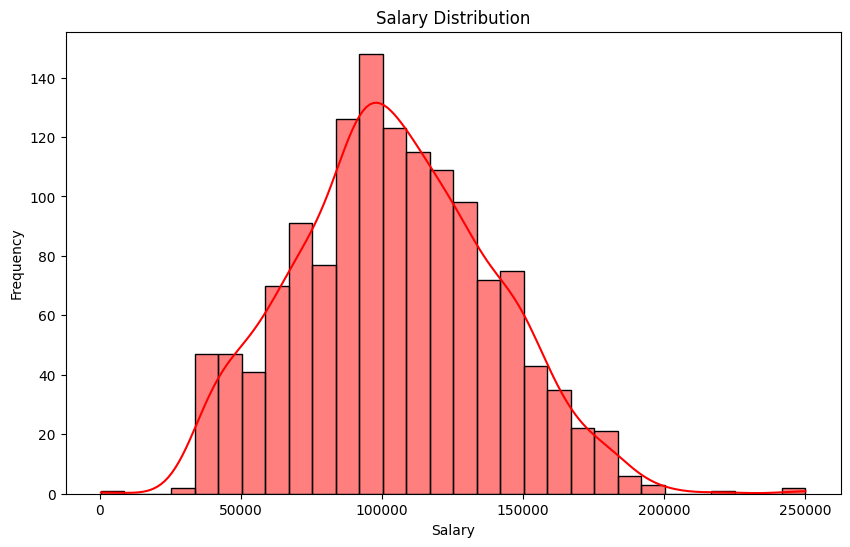

In [46]:
# Check salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=30, kde=True, color='red')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

Salary is roughly normal, slightly right-skewed.

Most salaries lie between 60,000 and 140,000 Dollars.

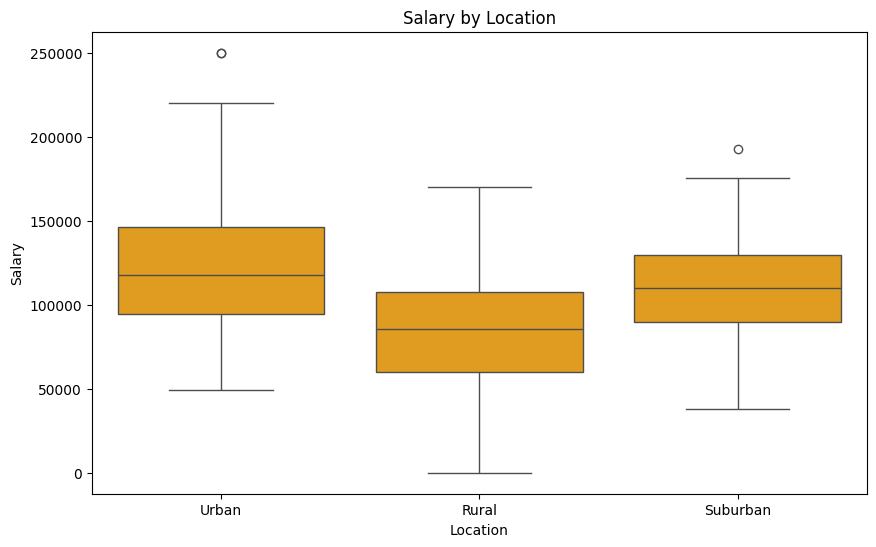

In [47]:
# Analyse salary by location
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Salary', data=df, color='orange')
plt.title('Salary by Location')
plt.xlabel('Location')
plt.ylabel('Salary')
plt.show()

Urban jobs have the highest median and widest range.

Rural locations show lower median salaries.

Suburban salaries fall between rural and urban but with noticeable high-end outliers.

Clear correlation: Location impacts salary.

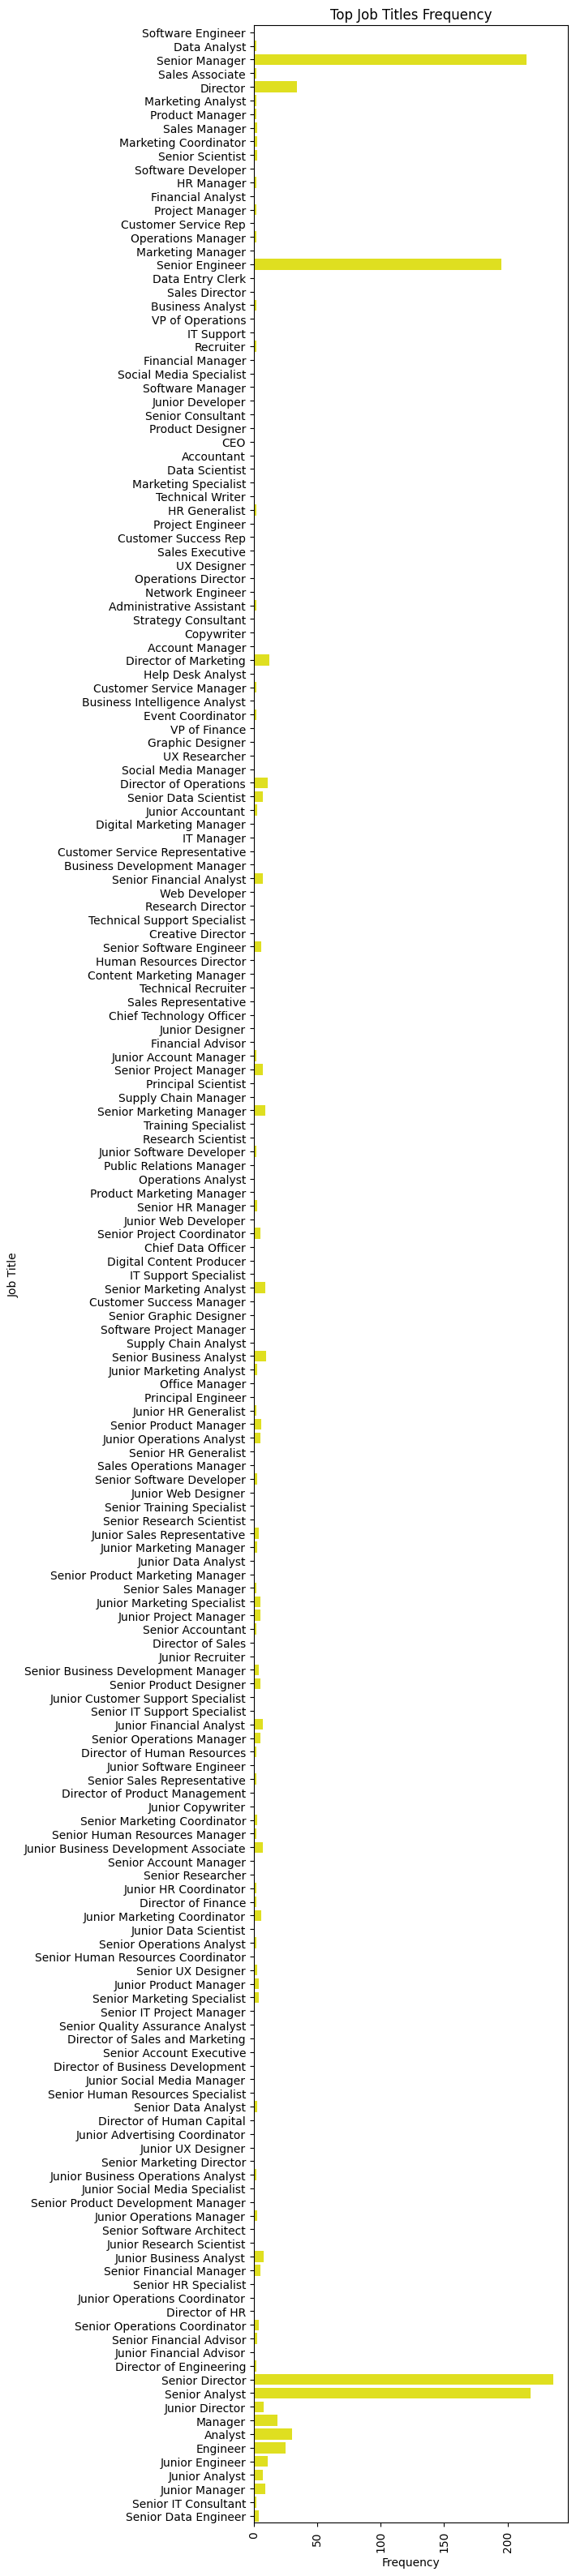

In [48]:
# Analyse top Job Titles Freq
plt.figure(figsize=(5, 40))
sns.countplot(y='Job Title', data=df, color='yellow')
plt.title('Top Job Titles Frequency')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Salary')

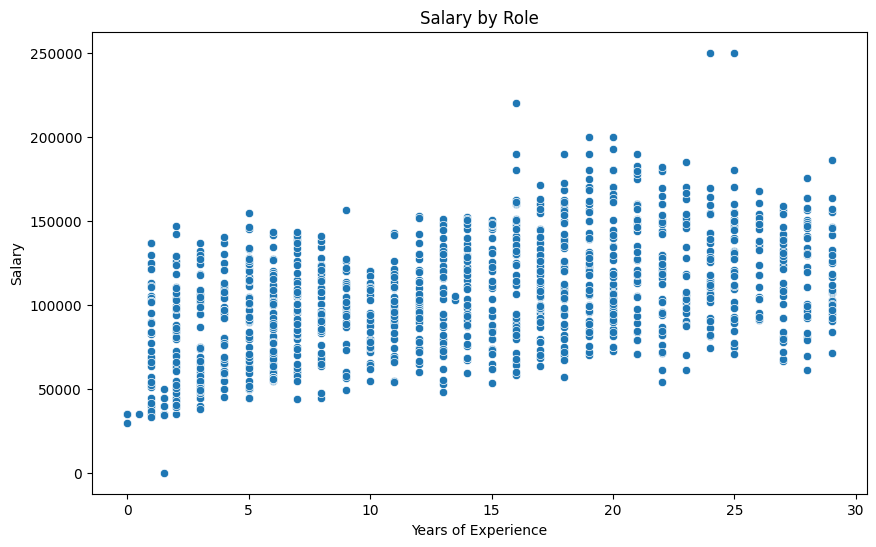

In [49]:
# Analyse salary by role using scatterplot without legend
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Salary', data=df)
plt.title('Salary by Role')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

Clear positive trend: More experience tends to correlate with higher salary.

<Axes: >

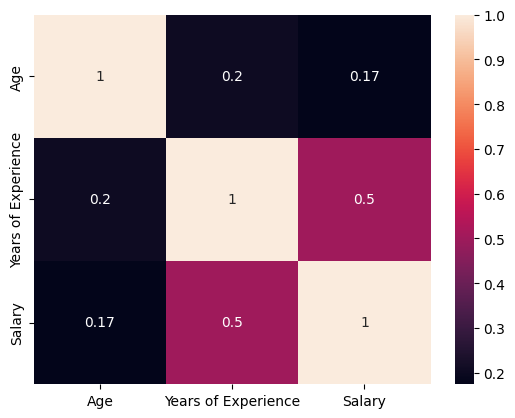

In [50]:
# Heatmap for Multi-variate analysis (Numerical Columns)
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True)

Salary and Experience: Correlation ≈ 0.5 (moderate).

Salary and Age: Weak correlation (~0.17), suggesting age isn’t a strong predictor by itself.

Experience matters more than age for salary prediction.

Text(0.5, 1.0, 'Most Common Job Titles/n')

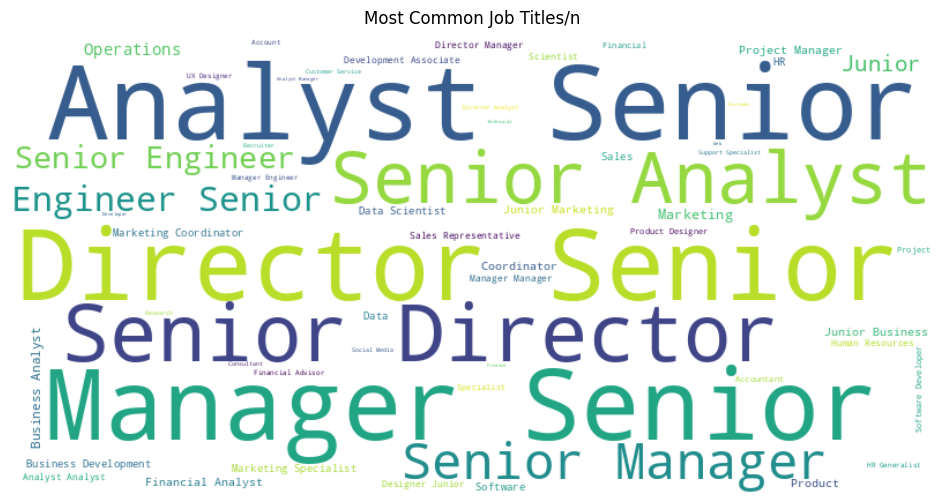

In [51]:
# Get most common job roles using wordcloud
from wordcloud import WordCloud

text = ' '.join(df['Job Title'].dropna())
wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Job Titles/n')

Roles like "Senior", "Director", "Analyst", "Manager", and "Engineer" dominate.

This confirms a good spread of entry to senior-level roles.

The prominence of "Senior" suggests a large portion of higher-paying roles.

## Feature Engineering

In [52]:
# Extracting seniority level (Junior, Senior, etc.) from job titles

In [53]:
def extract_seniority(title):
    title = str(title).lower()  # make lowercase for matching

    if 'junior' in title:
        return 'Junior'
    elif 'senior' in title:
        return 'Senior'
    elif any(x in title for x in ['lead', 'principal', 'head']):
        return 'Lead'
    elif any(x in title for x in ['director', 'vp', 'chief', 'ceo']):
        return 'Executive'
    else:
        return 'Mid'

In [54]:
df['Seniority Level'] = df['Job Title'].apply(extract_seniority)

In [55]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Location,Seniority Level
0,32.0,Male,Bachelor,Software Engineer,5.0,90000.0,Urban,Mid
1,28.0,Female,Master,Data Analyst,3.0,65000.0,Rural,Mid
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Urban,Senior
3,36.0,Female,Bachelor,Sales Associate,7.0,60000.0,Rural,Mid
4,52.0,Male,Master,Director,20.0,200000.0,Urban,Executive


In [56]:
# Create a function for mapping Job Titles into General Titles

def map_general_title(title):

    title = str(title).lower()

    if any(word in title for word in ['director', 'vp', 'chief', 'head']):
        return 'Director'
    elif any(word in title for word in ['manager', 'lead', 'supervisor']):
        return 'Manager'
    elif any(word in title for word in ['engineer', 'developer']):
        return 'Engineer'
    elif 'analyst' in title or 'intelligence' in title:
        return 'Analyst'
    elif 'scientist' in title or 'research' in title:
        return 'Scientist'
    elif any(word in title for word in ['designer', 'ux', 'ui']):
        return 'Designer'
    elif any(word in title for word in ['advisor', 'consultant']):
        return 'Advisor'
    else:
        return 'Other' # assistant, rep, coordinator, support, intern

In [57]:
# Create General Title Column
df['General Title'] = df['Job Title'].apply(map_general_title)

In [58]:
df['General Title'].value_counts()

,count
General Title,
Manager,337
Analyst,324
Director,323
Engineer,255
Other,90
Designer,19
Scientist,18
Advisor,9


## Encode Dataset (One Hot Encoding/Label Encoding)

Use OneHotEncoding/Label Encoding for non-ordinal categories with few unique values.

Use OrdinalEncoding if there's a natural order (e.g., education).

In [59]:
# Ordinal Encoding
df['Location'] = df['Location'].map({'Rural': 0, 'Suburban': 1, 'Urban': 2})
df['Education Level'] = df['Education Level'].map({'High School': 0, "Bachelor": 1, "Master": 2, 'PhD': 3})
df['Seniority Level'] = df['Seniority Level'].map({'Junior': 0, 'Mid': 1, 'Senior': 2, 'Lead': 3, 'Executive': 4})

In [60]:
# Label Encode (0-Female/1-Male)
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['General Title'] = LabelEncoder().fit_transform(df['General Title'])

In [61]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Location,Seniority Level,General Title
0,32.0,1,1,Software Engineer,5.0,90000.0,2,1,4
1,28.0,0,2,Data Analyst,3.0,65000.0,0,1,1
2,45.0,1,3,Senior Manager,15.0,150000.0,2,2,5
3,36.0,0,1,Sales Associate,7.0,60000.0,0,1,6
4,52.0,1,2,Director,20.0,200000.0,2,4,3


In [62]:
# no scaling needed for tree based models

## Train Test Split

In [63]:
x = df.drop(['Salary', 'Job Title'], axis=1)
y = df['Salary']

In [64]:
# xtrain, xtest: Feature splits
# ytrain, ytest: Target splits
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

## Perform Cross Validation

Validate model stability

In [65]:
# Import Models

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    RandomForestRegressor(), x, y, scoring='r2', cv=5
)

print("Cross-Validated R² scores:", scores)
print("Mean R²:", scores.mean())

Cross-Validated R² scores: [0.81441209 0.85010054 0.80260656 0.81581535 0.82988519]
Mean R²: 0.8225639438790899


In [67]:
scores = cross_val_score(
    XGBRegressor(), x, y, scoring='r2', cv=5
)

print("Cross-Validated R² scores:", scores)
print("Mean R²:", scores.mean())

Cross-Validated R² scores: [0.80313702 0.83743406 0.78994134 0.77971792 0.82411083]
Mean R²: 0.8068682332659393


In [68]:
scores = cross_val_score(
    LGBMRegressor(), x, y, scoring='r2', cv=5
)

print("Cross-Validated R² scores:", scores)
print("Mean R²:", scores.mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97
[LightGBM] [Info] Number of data points in the train set: 1100, number of used features: 7
[LightGBM] [Info] Start training from score 105655.498853
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 1100, number of used features: 7
[LightGBM] [Info] Start training from score 104178.591864
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM]

## Model Training

In [69]:
# Create function for model training

def train_and_evaluate(model, xtrain, ytrain, xtest, ytest):

  # Training
  model.fit(xtrain, ytrain)

  # Predict
  ypred = model.predict(xtest)

  # Evaluation
  mae = mean_absolute_error(ytest, ypred)
  r2 = r2_score(ytest, ypred)
  mse = mean_squared_error(ytest, ypred)
  rmse = np.sqrt(mean_squared_error(ytest, ypred))

  print('Model Name: ', {model.__class__.__name__})
  print("-"*50)
  print(f"MAE  : {mae:.2f}")
  print(f"MSE  : {mse:.2f}")
  print(f"RMSE : {rmse:.2f}")
  print(f"R²   : {r2:.4f}")

  return model

In [70]:
# Model 1: Random Forest
rf = train_and_evaluate(RandomForestRegressor(), xtrain, ytrain, xtest, ytest)

Model Name:  {'RandomForestRegressor'}
--------------------------------------------------
MAE  : 9585.68
MSE  : 155544271.70
RMSE : 12471.74
R²   : 0.8591


In [71]:
# Model 2: XGBoost
xgb = train_and_evaluate(XGBRegressor(), xtrain, ytrain, xtest, ytest)

Model Name:  {'XGBRegressor'}
--------------------------------------------------
MAE  : 10004.01
MSE  : 168756350.07
RMSE : 12990.63
R²   : 0.8471


In [72]:
# Model 3: LightGBM
lgbm = train_and_evaluate(LGBMRegressor(), xtrain, ytrain, xtest, ytest)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 1100, number of used features: 7
[LightGBM] [Info] Start training from score 105128.484592
Model Name:  {'LGBMRegressor'}
--------------------------------------------------
MAE  : 9643.09
MSE  : 147933398.99
RMSE : 12162.79
R²   : 0.8660


All three models perform well with an R² score ~0.85.

LightGBM has the best performance (highest R², lowest RMSE).

In [73]:
# LightGBM is the best model with higher CV and R²

## Hyperparameter Tuning

Improve accuracy & reduce error

In [81]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'num_leaves' : [20,31,40],
    'max_depth' : [-1,5,10,15],
    'learning_rate' : [0.01,0.05,0.1],
    'n_estimators' : [100,200,300],
    'min_child_samples' : [10,20,30]
}

lgbm_model = LGBMRegressor()

In [82]:
search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

search.fit(xtrain, ytrain)
print("Best parameters:", search.best_params_)
print("Best R² Score:", search.best_score_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 1100, number of used features: 7
[LightGBM] [Info] Start training from score 105128.484592
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [83]:
# Train on full data now
best_model = LGBMRegressor(**search.best_params_)

In [84]:
best_lgbm = train_and_evaluate(best_model, xtrain, ytrain, xtest, ytest)
best_lgbm

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 1100, number of used features: 7
[LightGBM] [Info] Start training from score 105128.484592
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

LGBMRegressor(max_depth=5, min_child_samples=30, n_estimators=200,
              num_leaves=40)

# Visualize the Predictions Vs Actual

In [79]:
y_pred = best_model.predict(xtest)

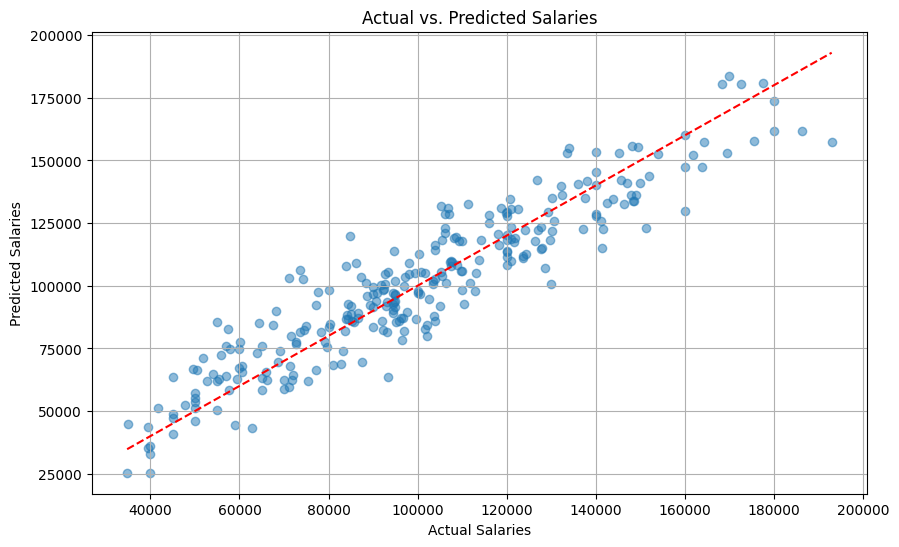

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(ytest, y_pred, alpha=0.5)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], linestyle='--', color='red')
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Actual vs. Predicted Salaries')
plt.grid(True)
plt.show()

## Save the model

In [85]:
import joblib

# Save the trained model
joblib.dump(best_model, 'salary_prediction_model.pkl')

print("Model saved as 'salary_prediction_model.pkl'")

Model saved as 'salary_prediction_model.pkl'
